# import

In [175]:
!pip install pandas_profiling --upgrade

Requirement already up-to-date: pandas_profiling in c:\users\user\anaconda3\lib\site-packages (3.0.0)


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  datetime import datetime, date, time
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# DATA

In [177]:
df = pd.read_csv('query_result.csv', parse_dates=['departure_day'], dayfirst=False)

In [178]:
df.head()

flight_id departure_airport arrival_airport   status    city  duration  \
0     136119               AAQ             SVO  Arrived  Moscow     101.0   
1     136120               AAQ             SVO  Arrived  Moscow      99.0   
2     136122               AAQ             SVO  Arrived  Moscow     100.0   
3     136130               AAQ             SVO  Arrived  Moscow      99.0   
4     136131               AAQ             SVO  Arrived  Moscow      99.0   

  departure_day departure_time  departure_day_of_week           model  \
0    2017-01-03           10:8                    2.0  Boeing 737-300   
1    2017-02-24           10:7                    5.0  Boeing 737-300   
2    2017-01-08           10:8                    7.0  Boeing 737-300   
3    2017-02-13           10:7                    1.0  Boeing 737-300   
4    2017-01-28           10:7                    6.0  Boeing 737-300   

   total_seats  total_amount  total_seat_sold  ticket_economy  ticket_comfort  \
0          130     1653000.0            113.0           102.0             0.0   
1          130     1605400.0            109.0            98.0             0.0   
2          130     1431000.0             97.0            87.0             0.0   
3          130     1556600.0            107.0            97.0             0.0   
4          130     1812800.0            124.0           112.0             0.0   

   ticket_bisiness  passenger_count  
0             11.0            113.0  
1             11.0            109.0  
2             10.0             97.0  
3             10.0            107.0  
4             12.0            124.0

In [179]:
df.tail()

flight_id departure_airport arrival_airport   status          city  \
122     136544               AAQ             NOZ  Arrived  Novokuznetsk   
123     136511               AAQ             NOZ  Arrived  Novokuznetsk   
124     136540               AAQ             NOZ  Arrived  Novokuznetsk   
125     136546               AAQ             NOZ  Arrived  Novokuznetsk   
126     136567               AAQ             NOZ  Arrived  Novokuznetsk   

     duration departure_day departure_time  departure_day_of_week  \
122     124.0    2017-01-31           6:10                    2.0   
123     130.0    2017-02-21           6:15                    2.0   
124     127.0    2017-01-17           6:14                    2.0   
125     122.0    2017-01-03           6:13                    2.0   
126     131.0    2017-02-14           6:12                    2.0   

              model  total_seats  total_amount  total_seat_sold  \
122  Boeing 737-300          130           NaN              NaN   
123  Boeing 737-300          130           NaN              NaN   
124  Boeing 737-300          130           NaN              NaN   
125  Boeing 737-300          130           NaN              NaN   
126  Boeing 737-300          130           NaN              NaN   

     ticket_economy  ticket_comfort  ticket_bisiness  passenger_count  
122             NaN             NaN              NaN              NaN  
123             NaN             NaN              NaN              NaN  
124             NaN             NaN              NaN              NaN  
125             NaN             NaN              NaN              NaN  
126             NaN             NaN              NaN              NaN

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   flight_id              127 non-null    int64         
 1   departure_airport      127 non-null    object        
 2   arrival_airport        127 non-null    object        
 3   status                 127 non-null    object        
 4   city                   127 non-null    object        
 5   duration               127 non-null    float64       
 6   departure_day          127 non-null    datetime64[ns]
 7   departure_time         127 non-null    object        
 8   departure_day_of_week  127 non-null    float64       
 9   model                  127 non-null    object        
 10  total_seats            127 non-null    int64         
 11  total_amount           118 non-null    float64       
 12  total_seat_sold        118 non-null    float64       
 13  ticke

# Функции

In [181]:
def string_to_datetime(string):
    "' функция переводит во время то недоразумение, что я получил из SQL'"
    return datetime.time(datetime.strptime(string.strip(' '), '%H:%M'))

In [182]:
df['departure_time'] = df['departure_time'].apply(string_to_datetime)

In [183]:
df['model'].value_counts()

Boeing 737-300         68
Sukhoi Superjet-100    59
Name: model, dtype: int64

In [184]:
#Словарь для заполнения  столбца по часовому расходу топлива в тоннах
fuel_consumption={'Boeing 737-300': 2.4, 'Sukhoi Superjet-100': 1.7}

In [185]:
df['fuel_consumption'] = df['model'].map(fuel_consumption)

In [186]:
#словарь для заполнения стоимость топлива по зимним месяцам 2017 года рублей,  за тонну
fuel_cost = {12: 47101, 1: 41435, 2: 39553}

In [187]:
df['fuel_cost'] =  df['departure_day'].dt.month.map(fuel_cost)

In [188]:
# столбец прибыли выручка минус стоимость топлива 
df['profit'] = df['total_amount'] - df['duration'] / 60 * df['fuel_consumption'] * df['fuel_cost']

In [189]:
# заполняемость салона
df['occupancy'] = df['total_seat_sold'] / df['total_seats'] *100

In [190]:
df['city'].value_counts()

Moscow          59
Belgorod        59
Novokuznetsk     9
Name: city, dtype: int64

Дубликатов найдено: 0
Пропусков найдено: 72


<AxesSubplot:>

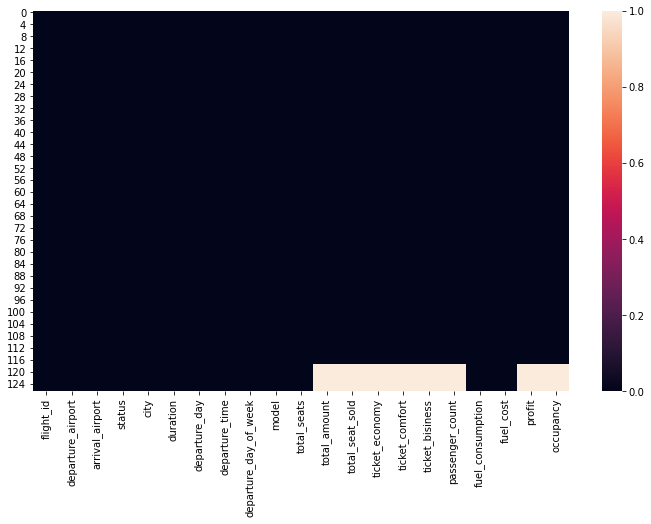

In [191]:
# Проверяем, где есть пропуски и дубликаты
print("Дубликатов найдено:", df.duplicated(keep=False).sum())
print("Пропусков найдено:", df.isnull().sum().sum())

# "Матрица" с пропусками для наглядной оценки
plt.subplots(figsize=(12, 7))
sns.heatmap(df.isnull())

In [192]:
df_noz=df[df['total_amount'].isnull()]

In [193]:
df_noz

flight_id departure_airport arrival_airport   status          city  \
118     136523               AAQ             NOZ  Arrived  Novokuznetsk   
119     136513               AAQ             NOZ  Arrived  Novokuznetsk   
120     136514               AAQ             NOZ  Arrived  Novokuznetsk   
121     136560               AAQ             NOZ  Arrived  Novokuznetsk   
122     136544               AAQ             NOZ  Arrived  Novokuznetsk   
123     136511               AAQ             NOZ  Arrived  Novokuznetsk   
124     136540               AAQ             NOZ  Arrived  Novokuznetsk   
125     136546               AAQ             NOZ  Arrived  Novokuznetsk   
126     136567               AAQ             NOZ  Arrived  Novokuznetsk   

     duration departure_day departure_time  departure_day_of_week  \
118     132.0    2017-01-10       06:14:00                    2.0   
119     130.0    2017-02-28       06:13:00                    2.0   
120     119.0    2017-02-07       06:14:00                    2.0   
121     125.0    2017-01-24       06:13:00                    2.0   
122     124.0    2017-01-31       06:10:00                    2.0   
123     130.0    2017-02-21       06:15:00                    2.0   
124     127.0    2017-01-17       06:14:00                    2.0   
125     122.0    2017-01-03       06:13:00                    2.0   
126     131.0    2017-02-14       06:12:00                    2.0   

              model  ...  total_amount  total_seat_sold  ticket_economy  \
118  Boeing 737-300  ...           NaN              NaN             NaN   
119  Boeing 737-300  ...           NaN              NaN             NaN   
120  Boeing 737-300  ...           NaN              NaN             NaN   
121  Boeing 737-300  ...           NaN              NaN             NaN   
122  Boeing 737-300  ...           NaN              NaN             NaN   
123  Boeing 737-300  ...           NaN              NaN             NaN   
124  Boeing 737-300  ...           NaN              NaN             NaN   
125  Boeing 737-300  ...           NaN              NaN             NaN   
126  Boeing 737-300  ...           NaN              NaN             NaN   

     ticket_comfort  ticket_bisiness  passenger_count  fuel_consumption  \
118             NaN              NaN              NaN               2.4   
119             NaN              NaN              NaN               2.4   
120             NaN              NaN              NaN               2.4   
121             NaN              NaN              NaN               2.4   
122             NaN              NaN              NaN               2.4   
123             NaN              NaN              NaN               2.4   
124             NaN              NaN              NaN               2.4   
125             NaN              NaN              NaN               2.4   
126             NaN              NaN              NaN               2.4   

     fuel_cost  profit  occupancy  
118      41435     NaN        NaN  
119      39553     NaN        NaN  
120      39553     NaN        NaN  
121      41435     NaN        NaN  
122      41435     NaN        NaN  
123      39553     NaN        NaN  
124      41435     NaN        NaN  
125      41435     NaN        NaN  
126      39553     NaN        NaN  

[9 rows x 21 columns]

Девять рейсов в Новокузнецк не имеют сведений о стоимости проданных билетов и о количестве пассажиров.
Анализ по ним  не возможен удалим эти рейсы. Остаются Москва и Белгород.

In [194]:
df.dropna(inplace = True)

Удалим технические  столбцы, не несущие информации или дублируюшщие ее

In [195]:
df.drop(['departure_airport',  'status', 'city',  'model', 'passenger_count'], axis=1, inplace = True)

# Одномерный анализ


Описательная статистика с помощью библиотеки pandas-profiling вычисляет:

-Количество уникальных значений (Distinct)

-Количество пропусков (Missing)

-Вероятно, параметр "Бесконечность" ('Infinite'), рассчитываемый только для вещественных чисел, отыскивает сильно выделяющиеся значения, которыми иногда обозначают пропуски.

-Среднее значение (Mean)

-Минимум (Minimum)

-Максимум (Maximum)

-Количество нулей (Zeros)

-Память, задействованная этой переменной (Memory Size)

-Нормальность распределения (график)

In [196]:
profile = ProfileReport(df)
profile

Сильную корреляуию с прибылью имеют длительность полета, выручка, количество пассажиров и расход топлива.
Собственно все из формулы расчета  прибыли

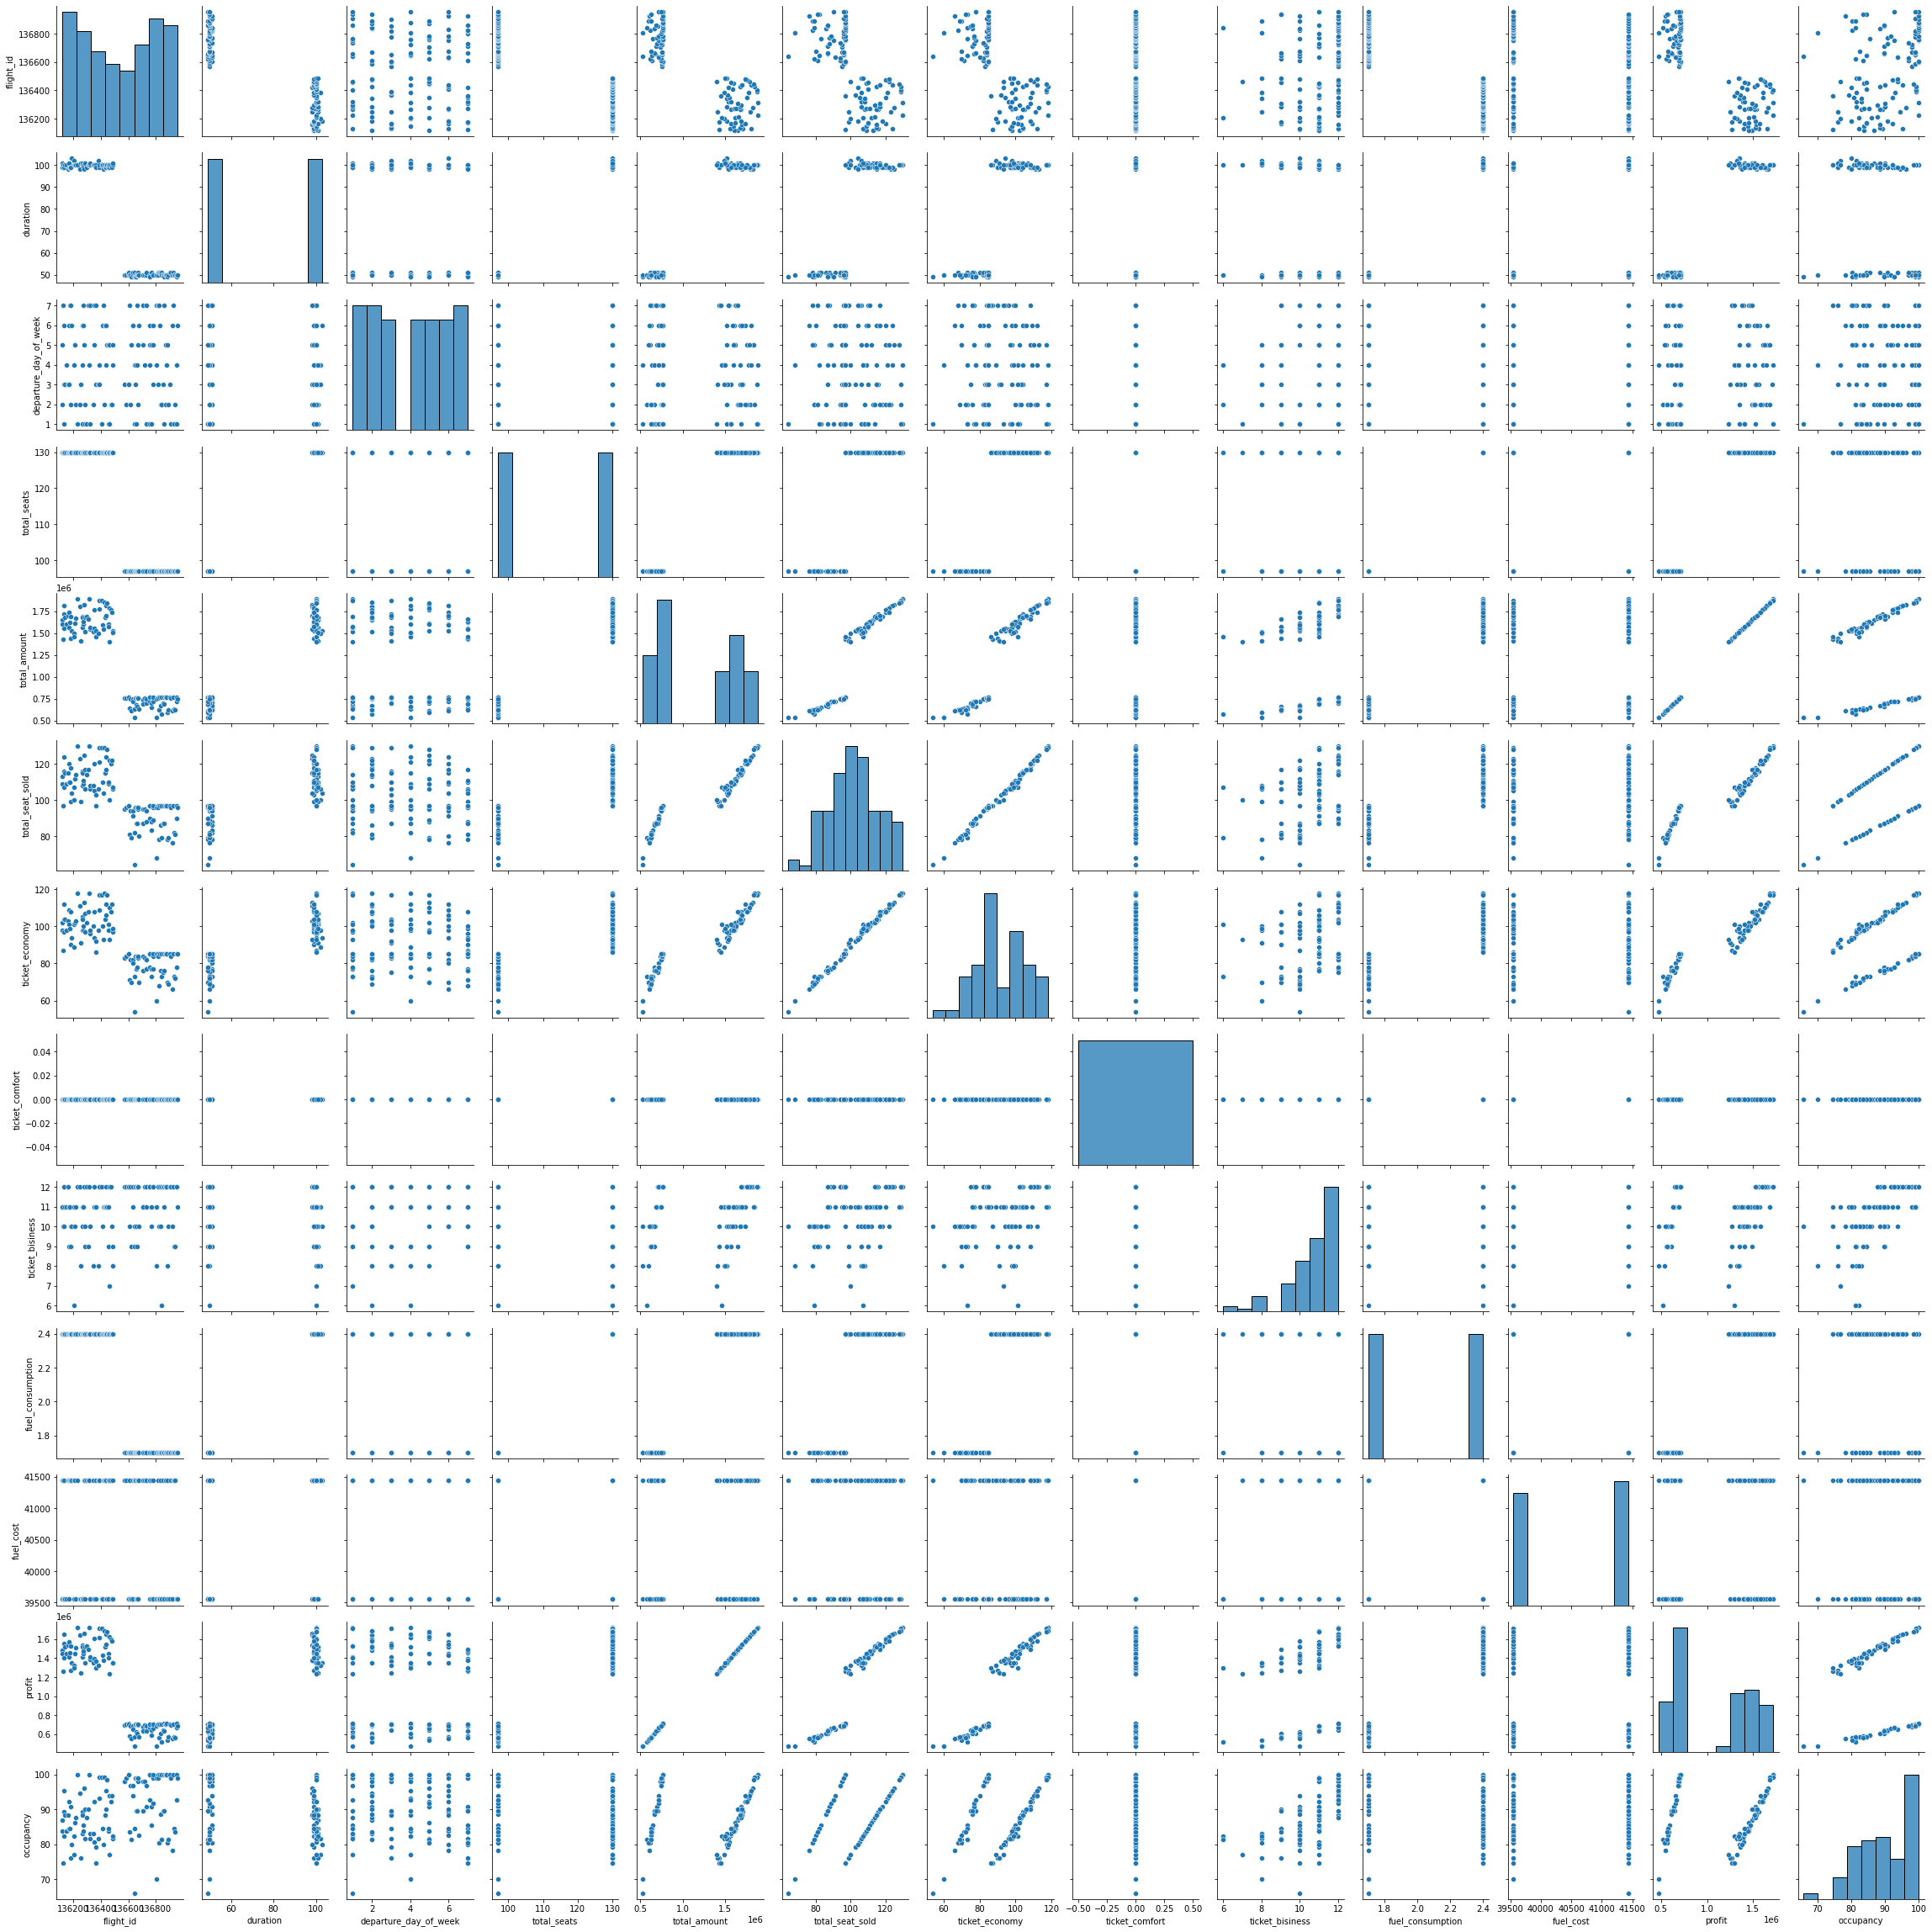

In [200]:
sns.pairplot(df)

Предпоследняя строка нам четко подразделила условную прибыль на два раздела, которые зависят от длительности полета и 
вместимости самолета, его прожорливости т.е. марки. Получается, что у нас Боинг летает 100 минут в Москву, 
а суперджет 50 минут в Белгород. Убирать нужно менее рентабельные полеты в Белгород, но если полностью закрыть направление нелься, то как выбрать какие именно  из них? Летать через день?


Вот id рейсов, которые нужно убрать на зимний период:

In [207]:
df.flight_id[df['arrival_airport'] == 'EGO']

59     136571
60     136586
61     136600
62     136605
63     136609
64     136612
65     136620
66     136630
67     136632
68     136642
69     136645
70     136649
71     136654
72     136660
73     136661
74     136666
75     136669
76     136672
77     136678
78     136706
79     136709
80     136720
81     136729
82     136733
83     136754
84     136755
85     136757
86     136758
87     136767
88     136769
89     136778
90     136780
91     136781
92     136802
93     136807
94     136815
95     136819
96     136823
97     136827
98     136838
99     136841
100    136844
101    136855
102    136857
103    136861
104    136869
105    136871
106    136875
107    136887
108    136888
109    136900
110    136907
111    136922
112    136927
113    136936
114    136937
115    136951
116    136953
117    136956
Name: flight_id, dtype: int64